Machine Learning (ML) Theory
============================

What happens under the hood when we build a model?
--------------------------------------------------

-   Understanding how ML algorithms work can help choose the appropriate
    model and parameters, and help interpret errors and model failure.
-   Some models are transparent (e.g. regression) - we can see the
    underlying equations.
-   Most ML algorithms are a "black box"
-   Nevertheless, all ML can be considered a type of optimization.
-   ML algorithms optimize for increased accuracy or reduced error.

Cost function and optimization objective
----------------------------------------

-   Optimzation refers to minimizing or maximizing a function f(x) by
    altering x. (f(x) is called the objective function or cost function)
-   For example, if x is the value of blood glucose above which a
    patient is diabetic, and f(x) is the accuracy of identifying
    diabetic patients, then the goal of ML algorithm is to change x so
    that is optimizes f(x).

Finding the right cost function
-------------------------------

-   In some cases, the cost function is straightforward - e.g. reducing
    the error in classification of patients (diabetes vs normal).
-   Sometimes it is difficult to decide what should be optimized. For
    example, should we measure the accuracy of binary classification
    (normal vs disease) or extent of the disease (stages of heart
    disease). Should we give partial credit for getting close to the
    right stage?
-   Should we penalize small but frequent errors, or large but rare
    errors?

Examples of cost functions
--------------------------

-   For regression (most common): **MSE - Mean squared error**
$$mean(|Y-Y_{pred}|^2) \text{ or } \frac{\sum(Y-Y_{pred})^2}{N}$$ 
-   Regression: **MAE - Mean absolute error**
$$mean(|Y-Y_{pred}|)$$
\*MSE gives higher weight to large errors. In contrast, MAE increases linearly with error.
-   For classification: **cross-entropy or log loss**
$$y*\log(p)+(1-y)*\log(1-p)$$
where y is 0 or 1, and p is the predicated probabilty (e.g. from logistic regression)


How do we optimize the cost function? 
-------------------------------------

-   Calculus!
-   In general, for building a ML model, we try to minimize an
    objective.

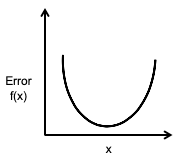

-   The minimum of a function can be found using differentiation.
-   Find f'(x) or dy/dx
-   F(x) is minimum or maximum when f'(x) = 0
-   Points where f'(x) = 0 are known as critical points or stationary
    points.
-   A local minimum is a point where f(x) is lower than all neighboring
    points

Finding minima using Gradient descent 
-------------------------------------

-   Make a small change to x and calculate f(x) and f'(x). The value of
    slope tells you how to change x.
-   In the gradient descent approach, the algorithm makes small changes
    in x with the opposite sign of the slope until you hit slope = 0.
-   A point that obtains the absolute lowest value of f(x) is a global
    minimum.
-   This approach can be scaled to multiple variables using partial
    derivatives.

Gradient descent - parameters
-----------------------------

-   In practice, the algorithm may never hit zero precisely, but a very
    small number close zero (say 1E-6). We can enforce the number below
    which we can assume the slope to be zero (e.g. 1E-6). This number is
    called the tolerance.
-   An important parameter in Gradient Descent is the step size or
    learning rate. If the learning rate is too small, then the algorithm
    will take a long time to find the minima. If the learning rate is
    too high, it might miss the minima and jump across the valley.

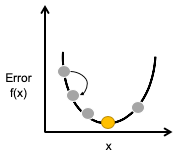


Regression 
----------

-   Consider a linear regression model to predict Y from X.

$$Y_{pred} = mX$$

-   The goal is to find "m" that best "fits" the data - i.e. minimizes
    the difference between Y and Ypred.
-   Cost function - **Mean squared error (MSE)**:
$$mean(|Y-Y_{pred}|^2)$$
-   The cost function changes as you change "m"
-   Optimization goal: find "m" that minimizes MSE
-   The best "m" is found by MATLAB using gradient descent


Regularization 
--------------

-   Framework to reduce overfitting
-   Idea: find the simplest model that explains the data.
-   Penalize complexity - for example if a linear model with a single
    parameter does equally well as a quadratic model with two
    parameters, then the linear model is chosen.
-   Hyperparameter (lambda, λ) - penalizes complexity

Finding the best regularization model
-------------------------------------

-   The optimization objective: Minimize MSE + Minimize regression
    coefficients

$$\min(MSE+\lambda\beta)$$

-   If lambda = 0, then it is normal regression
-   How to find the best lambda?
-   Cross validation!
-   Do cross validation on the training set.

Regularization approach: Lasso regression 
-----------------------------------------

-   Lasso regression penalizes model complexity; identifies the simplest
    model by removing correlated variables.
-   Using lasso with 3-fold cross-validation to find the best lambda:

```python
sklearn.linear_model.LassoCV(cv=3).fit(X, Y)
```
-   Let's compare Traditional regression vs Lasso regression

Test models using simulated data 
--------------------------------

-   Simulated datasets are very useful for understanding how models work
    - since we know the right "answer" (i.e. the model that best
    explains the data, as we created the model).
-   Let's create a simple linear model that's a function of 2 variables
    + 4 noise variables.

Regression coefficients; only 1st and 2nd are non-zero:

In [1]:
import numpy as np
import sklearn
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_predict
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import explained_variance_score
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
beta = np.array([[1],[5],[0],[0],[0],[0]])
beta

array([[1],
       [5],
       [0],
       [0],
       [0],
       [0]])

Create a random variable X from a normal distribution with mean 0 and variance 1:


In [3]:
X = np.random.normal(size=[50, 6])

$$Y = f(x) + N$$:

In [4]:
y = X@beta + np.random.randn(50,1)

The number of columns of the 1st matrix must equal the number of rows of the 2nd matrix.



Compare Traditional regression vs Lasso in simulated data
---------------------------------------------------------

In [5]:
model = LassoCV(cv=10).fit(X, y)
B1_coeff = model.coef_
B1_coeff

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.59068183,  5.02574543,  0.        , -0.        ,  0.        ,
        0.        ])

In [6]:
B1_intercept = model.intercept_
B1_intercept

-0.08638723446942823

In [7]:
X_ones = add_constant(X)
result = sm.OLS(y, X_ones).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     266.8
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.40e-32
Time:                        06:21:58   Log-Likelihood:                -67.261
No. Observations:                  50   AIC:                             148.5
Df Residuals:                      43   BIC:                             161.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0569      0.153     -0.372      0.711      -0.365       0.251
x1             0.7166      0.185      3.867      0.000       0.343       1.090
x2             5.1197      0.142     35.982      0.000       4.833       5.407
x3             0.1038      0.202      0.514      0.610      -0.304       0.511
x4            -0.0957      0.138     -0.694      0.491      -0.374       0.182
x5             0.0916      0.127      0.722      0.474      -0.164       0.347
x6             0.0776      0.130      0.599      0.552      -0.184       0.339
==============================================================================
Omnibus:                        1.787   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.336
Skew:                          -0.179   Prob(JB):                        0.513
Kurtosis:                       2.284   Cond. No.                         2.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Which B is closer to the actual Betas used to generate Y?

Test accuracy of both methods using 3-fold cross validation.

In [8]:
# Create indices for 3-fold cross validation
kf = KFold(n_splits=3, shuffle=True)

# Initialize RMSE arrays
rmse_lasso = np.zeros(3);
rmse_regress = np.zeros(3);

for i, (train_i, test_i) in enumerate(kf.split(X_ones)):
  Xtrain = X[train_i,:]
  X_ones_train = X_ones[train_i,:]
  ytrain = y[train_i,:]
  
  Xtest = X[test_i,:]
  X_ones_test = X_ones[test_i,:]
  ytest = y[test_i,:]

  model = LassoCV(cv=10).fit(Xtrain, ytrain)
  B1_coeff = model.coef_
  B1_intercept = model.intercept_
  
  B2 = sm.OLS(ytrain, X_ones_train).fit()
  y_lasso = Xtest@B1_coeff + B1_intercept

  y_regress = B2.predict(X_ones_test)
  rmse_lasso[i] = np.sqrt(np.mean(np.square(y_lasso-ytest)))
  rmse_regress[i] = np.sqrt(np.mean(np.square(y_regress-ytest)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
np.mean(rmse_lasso), np.mean(rmse_regress)

(7.843475337478002, 7.903972223978755)

Partial least square (PLS) regression
-------------------------------------

-   This approach first groups predictors into groups/clusters similar
    to principal component analysis (PCA) or clustering.
-   It then performs regression on these clusters, thereby reducing the
    number of features used in the regression model.
-   In PLS regression you can specify the number of predictors you want
    in the final model.


In [10]:
B3 = PLSRegression(n_components=3)
B3.fit(add_constant(X), y)
B3.coef_

array([[ 0.        ],
       [ 0.63291427],
       [ 5.49564912],
       [ 0.03115813],
       [-0.11409401],
       [ 0.07305269],
       [ 0.09154656]])

Compare beta from PLS with other methods.

In [11]:
 pd.DataFrame(np.hstack((B1_coeff.reshape(-1, 1), B2.params[1:].reshape(-1, 1), B3.coef_[1:])), columns=["Lasso", 'Normal', 'PLS'])

,Lasso,Normal,PLS
0,0.535536,0.702433,0.632914
1,4.999707,5.062073,5.495649
2,0.000000,0.096690,0.031158
3,-0.051139,-0.202278,-0.114094
4,0.049665,0.143580,0.073053
5,0.000000,0.026139,0.091547


Compare Traditional Regression vs Lasso, Stepwise, and PLS in Cleveland data 
----------------------------------------------------------------------------

-   Predict disease severity using all variables as input.
-   For Lasso and PLS, estimate hyperparameters (lambda) in training
    data with 3-fold cross validation
-   Test accuracy of all methods using 5-fold cross validation - output
    RMSE and correlation in test set
-   Find features that are predicted to be most important using each of
    these methods.


In [12]:
!gdown --id 18a94Yk7ADCQtDUrQlfWmmJGq-1I33I7-

Downloading...
From: https://drive.google.com/uc?id=18a94Yk7ADCQtDUrQlfWmmJGq-1I33I7-
To: /content/cleveland_data_revised.xlsx
100% 28.1k/28.1k [00:00<00:00, 4.08MB/s]


In [13]:
# Load the Cleveland data set
data = pd.read_excel("cleveland_data_revised.xlsx").dropna()
# Remove rows with NaN and separate data into X and y
X = data.iloc[:,:13].values
y = data.diseaseSeverity.to_numpy()

Before creating the four models, we need to determine the number of
components to specify in the PLS model.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid number of components: 0

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid number of components: 0

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid number of components: 0

  FitFailedWarning)


Text(0, 0.5, 'MSE')

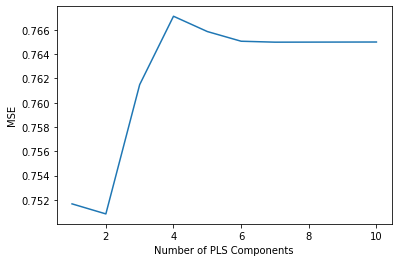

In [14]:

mse = []
cv=3
# Calculate MSE with only the intercept
# score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
          #  np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
# mse.append(score)
for i in np.arange(0, 11):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    # y_pred = pls.fit_transform(X)
    # score = np.
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')


It appears that 6 components is adequete for minimizing the error of the PLS model. We can now create a for loop which creates the normal, lasso, stepwise and PLS models.

In [20]:
kf = KFold(n_splits=3, shuffle=True)

# Initialize RMSE arrays
rmse_lasso = np.zeros(3);
rmse_regress = np.zeros(3);
rmse_pls = np.zeros(3);
X_ones = add_constant(X)

for i, (train_i, test_i) in enumerate(kf.split(X_ones)):
  Xtrain = X[train_i,:]
  X_ones_train = X_ones[train_i,:]
  # print(y)
  ytrain = y[train_i]
  
  Xtest = X[test_i,:]
  X_ones_test = X_ones[test_i,:]
  ytest = y[test_i]

  model = LassoCV(cv=10).fit(Xtrain, ytrain)
  B1_coeff = model.coef_
  B1_intercept = model.intercept_
  
  B2 = sm.OLS(ytrain, X_ones_train).fit()
  y_lasso = Xtest@B1_coeff + B1_intercept
  y_regress = B2.predict(X_ones_test)

  B3 = PLSRegression(n_components=10).fit(X_ones_train, ytrain)
  y_pls = B3.predict(X_ones_test)

  rmse_lasso[i] = np.sqrt(np.mean(np.square(y_lasso-ytest)))
  rmse_regress[i] = np.sqrt(np.mean(np.square(y_regress-ytest)))
  rmse_pls[i] = np.sqrt(np.mean(np.square(y_pls-ytest)))

In [19]:
np.mean(rmse_lasso), np.mean(rmse_regress), np.mean(rmse_pls)

(0.850572552936841, 0.8550013540773994, 1.5543529419240087)


No Free Lunch Theorem
---------------------

-   "No specific ML algorithm is universally superior to any other
    algorithm."
-   If an algorithm performs better than random search on some problems,
    then it will perform worse than random on other problems.
-   What a given algorithm (e.g. decision trees or lasso) gains on one
    type of classification problems (e.g. classifying images) is offset
    by its performance on the remaining problems.

No Free Lunch - take home
-------------------------

-   How well any algorithm performs is determined by how well matched
    the algorithm is with the problem at hand.
-   We need to understand the process that generated the data (e.g. what
    causes diabetes?) to decide which model to use.
-   Having domain expertise is important!

\

